In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, brier_score_loss, auc 
# Definições de cores -> todas estão numa escala de mais escura para mais clara.
CINZA1, CINZA2, CINZA3 = '#231F20', '#414040', '#555655'
CINZA4, CINZA5, CINZA6 = '#646369', '#76787B', '#828282'
CINZA7, CINZA8, CINZA9 = '#929497', '#A6A6A5', '#BFBEBE'
AZUL1, AZUL2, AZUL3, AZUL4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
VERMELHO1, VERMELHO2, VERMELHO3, VERMELHO4, VERMELHO5 = '#DB0527', '#E23652', '#ED8293', '#F4B4BE', '#FBE6E9'
VERDE1, VERDE2 = '#0C8040', '#9ABB59'
LARANJA1 = '#F79747'
AMARELO1, AMARELO2, AMARELO3, AMARELO4, AMARELO5 = '#FFC700', '#FFCC19', '#FFEB51', '#FFE37F', '#FFEEB2'
BRANCO = '#FFFFFF'

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [169]:
def evaluate_classifier(y_true, y_pred, probas):
    '''
    Evaluate the performance of a binary classifier and visualize results.

    This function calculates and displays various evaluation metrics for a binary classifier,
    including the classification report, confusion matrix, ROC AUC curve, PR curve and brier score.

    Args:
    - y_true: True binary labels.
    - y_pred: Predicted binary labels.
    - probas: Predicted probabilities of positive class.

    Returns:
    - None (displays evaluation metrics).

    Raises:
    - CustomException: If an error occurs during evaluation.
    '''

    try:
        # Classification report.
        print(classification_report(y_true, y_pred))

        # Calculating and printing brier score.
        brier_score = brier_score_loss(y_true, probas)
        print(f'Brier Score: {round(brier_score, 2)}')
        
        # Confusion matrix.
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot = True, fmt = 'd')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Values')
        plt.ylabel('Real Values')
        plt.show()
        
        # ROC AUC Curve and score.
        fpr, tpr, thresholds = roc_curve(y_true, probas)
        roc_auc = roc_auc_score(y_true, probas)

        fig, ax = plt.subplots(figsize=(7, 4))
        ax.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color=AZUL1)
        ax.plot([0, 1], [0, 1], linestyle='--', color=CINZA4)  # Random guessing line.
        ax.set_xlabel('False Positive Rate', fontsize=10.8, color=CINZA1, labelpad=20)
        ax.set_ylabel('True Positive Rate', fontsize=10.8, color=CINZA1, labelpad=20)
        ax.set_xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], color=CINZA1)
        ax.set_yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], color=CINZA1)
        ax.set_title('Receiver Operating Characteristic (ROC) Curve', fontweight='bold', fontsize=12, color=CINZA1, pad=20)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color(CINZA9)
        ax.spines['bottom'].set_color(CINZA9)
        ax.legend()
    
        # PR AUC Curve and score.

        # Calculate model precision-recall curve.
        precision, recall, _ = precision_recall_curve(y_true, probas)
        pr_auc = auc(recall, precision)

        fig, ax = plt.subplots(figsize=(7, 4))
        # Plot the model precision-recall curve.
        ax.plot(recall, precision, marker='.', label=f'PR AUC = {pr_auc:.2f}', color=AZUL1)
        ax.set_xlabel('Recall', fontsize=10.8, color=CINZA1, labelpad=20)
        ax.set_ylabel('Precision', fontsize=10.8, color=CINZA1, labelpad=20)
        ax.set_xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], color=CINZA1)
        ax.set_yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], color=CINZA1)
        ax.set_title('Precision-Recall (PR) Curve', fontweight='bold', fontsize=12, color=CINZA1, pad=20)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color(CINZA9)
        ax.spines['bottom'].set_color(CINZA9)
        ax.legend()


    except Exception as e:
        raise CustomException(e, sys)


def plot_probability_distributions(y_true, probas):
    '''
    Plots the kernel density estimate (KDE) of predicted probabilities for absent and present candidates.

    Parameters:
    - y_true (array-like): The true class labels (0 for present, 1 for absent).
    - probas (array-like): Predicted probabilities for the positive class (absent candidates).

    Raises:
    - CustomException: Raised if an unexpected error occurs during plotting.

    Example:
    ```python
    plot_probability_distributions(y_true, probas)
    ```

    Dependencies:
    - pandas
    - seaborn
    - matplotlib

    Note:
    - The function assumes the existence of color constants VERDE1, VERMELHO1, CINZA1, CINZA9.

    The function creates a KDE plot illustrating the distribution of predicted probabilities for absent and present candidates.
    It provides visual insights into the model's ability to distinguish between the two classes.

    '''
    try:
        probas_df = pd.DataFrame({'Probabilidade de Abstenção': probas,
                                'Abstenção': y_true})

        fig, ax = plt.subplots(figsize=(10, 4))
        sns.kdeplot(data=probas_df, x='Probabilidade de Abstenção', hue='Abstenção', fill=True, ax=ax, palette=[VERDE1, VERMELHO1])
        ax.set_title('Distribuição das Probabilidades Preditas entre Candidatos Presentes e Ausentes', fontweight='bold', fontsize=12, color=CINZA1, pad=20)
        ax.set_xlabel('Probabilidades Preditas', fontsize=10.8, color=CINZA1, labelpad=20)
        ax.set_ylabel('Densidade', fontsize=10.8, color=CINZA1, labelpad=20)
        ax.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'],
                    color=CINZA1)
        ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6],
                    ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6'],
                    color=CINZA1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color(CINZA9)
        ax.spines['bottom'].set_color(CINZA9)
    except Exception as e:
        raise CustomException(e, sys)


def plot_scores_percentages(y_true, probas):
    '''
    Plots the percentage of present and absent instances grouped by predicted probability score ranges.

    Parameters:
    - y_true (array-like): The true class labels (0 for present, 1 for absent).
    - probas (array-like): Predicted probabilities for the positive class (absent candidates).

    Raises:
    - CustomException: Raised if an unexpected error occurs during plotting.

    Example:
    ```python
    plot_scores_percentages(y_true, probas)
    ```

    Dependencies:
    - pandas
    - seaborn
    - matplotlib

    The function creates a horizontal stacked bar chart illustrating the percentage of present and absent instances
    for different predicted probability score ranges. It helps visualize the distribution of predicted probabilities.

    Note:
    - The function assumes the existence of color constants VERDE1, VERMELHO1, CINZA1.

    '''
    try:
        probas_df = pd.DataFrame({'Probabilidade de Abstenção': probas,
                                'Abstenção': y_true}).reset_index(drop=True)
        thresholds = np.arange(0.0, 1.1, 0.1)
        labels = [f'{t:.1f} a {t + 0.1:.1f}' for t in thresholds[:-1]]
        probas_df['Faixa de Score'] = pd.cut(probas_df['Probabilidade de Abstenção'], bins=thresholds, labels=labels, include_lowest=True)

        probas_grouped = probas_df.groupby(['Faixa de Score'])[['Abstenção']].mean().reset_index().rename(columns={'Abstenção': 'Ausente'})
        probas_grouped['Presente'] = 1 - probas_grouped['Ausente']

        fig, ax = plt.subplots(figsize=(15, 4))

        # Plot the horizontal stacked bar chart
        sns.barplot(x="Presente", y="Faixa de Score", data=probas_grouped, color=VERDE1, label="Presente", ax=ax, left=probas_grouped['Ausente'])
        sns.barplot(x="Ausente", y="Faixa de Score", data=probas_grouped, color=VERMELHO1, label="Ausente", ax=ax)

        ax.set_title('Percentual de Presentes e Ausentes por Faixa de Score', color=CINZA1, fontweight='bold', fontsize=12, pad=20)
        ax.set_yticks(ticks=range(10), labels=labels, color=CINZA1, fontsize=11.2)
        ax.set_ylabel('')
        ax.get_xaxis().set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

        # Annotate the percentages inside the bars
        for i, bar in enumerate(ax.patches):
            width = bar.get_width()
            height = bar.get_height()
            x = bar.get_x()
            y = bar.get_y()
            
            if i < len(probas_grouped):
                continue
            
            percentage = width * 100  
            ax.text(x + width / 2, y + height / 2, f"{percentage:.1f}%", ha="center", va="center", color="white", fontsize=10.8)

        for i, bar in enumerate(ax.patches[:len(probas_grouped)]):
            width = bar.get_width()
            height = bar.get_height()
            x = bar.get_x()
            y = bar.get_y()
            
            percentage = probas_grouped['Presente'].iloc[i] * 100  
            ax.text(x + width / 2, y + height / 2, f"{percentage:.1f}%", ha="center", va="center", color="white", fontsize=10.8)

        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper right", ncol=1)
        plt.show()
    except Exception as e:
        raise CustomException(e, sys)
    

In [3]:
parquet_file_path = '/Users/pedrohenriquealmeidaoliveira/Documents/data_science/large_files/clean_loan_data_2007_2014.parquet'
df = pd.read_parquet(parquet_file_path)

In [4]:
df['default'] = df['default'].replace({1: -1})
df['default'] = df['default'].replace({0: 1})
df['default'] = df['default'].replace({-1: 0})
df.default.value_counts(normalize=True)

default
0    0.890693
1    0.109307
Name: proportion, dtype: float64

In [44]:
bad_rate_safras = df.set_index('issue_d').resample('1M')[['default']].mean().reset_index().rename(columns={'default': 'bad_rate'})
#bad_rate_safras = bad_rate_safras.iloc[3:, :]
bad_rate_safras['bad_rate'] *= 100
volume_safras = df.set_index('issue_d').resample('6M')[['default']].count().reset_index().rename(columns={'default': 'count'})
bad_rate_safras

,issue_d,bad_rate
0,2007-06-30,0.000000
1,2007-07-31,11.864407
2,2007-08-31,28.571429
3,2007-09-30,24.528302
4,2007-10-31,32.380952
5,2007-11-30,30.357143
6,2007-12-31,27.325581
7,2008-01-31,27.540984
8,2008-02-29,19.934641
9,2008-03-31,22.139303


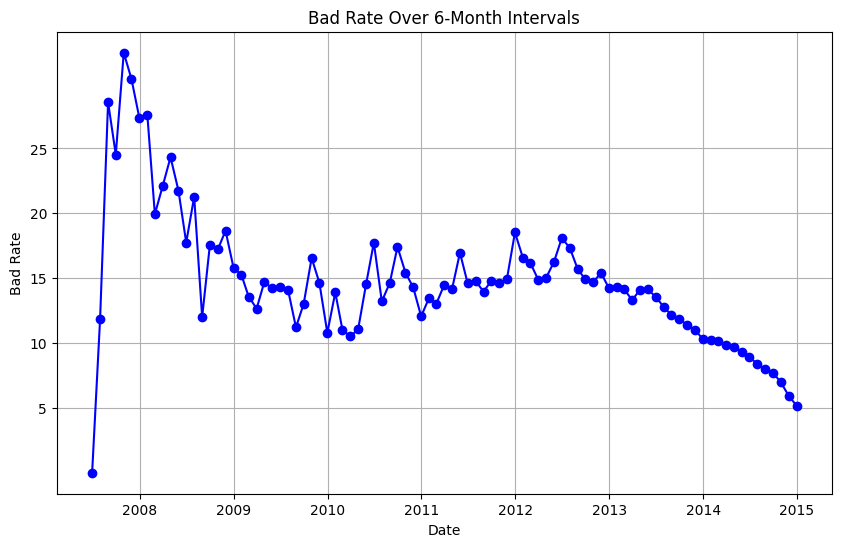

In [48]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bad_rate_safras['issue_d'], bad_rate_safras['bad_rate'], marker='o', linestyle='-', color='b')
plt.title('Bad Rate Over 6-Month Intervals')
plt.xlabel('Date')
plt.yticks([5, 10, 15, 20, 25], [5, 10, 15, 20, 25])
plt.ylabel('Bad Rate')
plt.grid(True)
plt.show()

In [19]:
volume_safras

,issue_d,count
0,2007-06-30,3
1,2007-12-31,571
2,2008-06-30,1511
3,2008-12-31,882
4,2009-06-30,1993
5,2009-12-31,3288
6,2010-06-30,5178
7,2010-12-31,7359
8,2011-06-30,9228
9,2011-12-31,12493


In [171]:
data_leakage_features = ['funded_amnt', 'installment', 'issue_d', 'revol_util', 'out_prncp',
                         'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                         'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
                         'tot_coll_amt']
irrelevant_features = ['delinq_2yrs', 'acc_now_delinq', 'total_rev_hi_lim']
df = df.drop(columns=data_leakage_features + irrelevant_features)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466256 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   loan_amnt                    int32   
 1   term                         int8    
 2   int_rate                     float32 
 3   grade                        category
 4   sub_grade                    category
 5   emp_length                   int16   
 6   home_ownership               category
 7   annual_inc                   float32 
 8   verification_status          category
 9   purpose                      category
 10  addr_state                   category
 11  dti                          float32 
 12  inq_last_6mths               int16   
 13  mths_since_last_delinq       float32 
 14  open_acc                     int16   
 15  pub_rec                      int16   
 16  revol_bal                    int64   
 17  total_acc                    int16   
 18  initial_list_status          

In [174]:
df['home_ownership'] = df['home_ownership'].replace({'ANY': 'RENT'})
df.home_ownership.unique()

['RENT', 'MORTGAGE', 'OWN', 'NONE', 'OTHER']
Categories (5, object): ['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']

In [39]:
# Out-of-time split. 80% training, 20% testing.
train, test = np.split(df, [int(.80 * len(df))])
train.shape, test.shape

((373004, 39), (93252, 39))

In [176]:
X_train = train.drop(columns=['default'])
y_train = train['default'].copy()
X_test = test.drop(columns=['default'])
y_test = test['default'].copy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373004, 21), (373004,), (93252, 21), (93252,))

In [177]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('category').columns.tolist()
print(numerical_features)

['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'tot_cur_bal', 'mths_since_earliest_cr_line']


In [178]:
print(categorical_features)

['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']


In [179]:
cat_pipe = Pipeline(
    [
        ('one_hot', OneHotEncoder())
    ]
)

num_pipe = Pipeline(
    [
        ('imputer', SimpleImputer(strategy= 'mean')),
        ('std_scaler', StandardScaler())
    ]
)

In [180]:
preprocessor = ColumnTransformer(
    [
        ('one_hot', cat_pipe, categorical_features),
        ('imputing_scaling', num_pipe, numerical_features),
    ]
)

In [181]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

In [182]:
X_train_prepared.shape, X_test_prepared.shape

((373004, 130), (93252, 130))

Logistic Regression with class_weight

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     86991
           1       0.38      0.00      0.00      6261

    accuracy                           0.93     93252
   macro avg       0.65      0.50      0.48     93252
weighted avg       0.90      0.93      0.90     93252

Brier Score: 0.06


/Users/pedrohenriquealmeidaoliveira/Documents/data_science/lending_club_credit_scoring/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


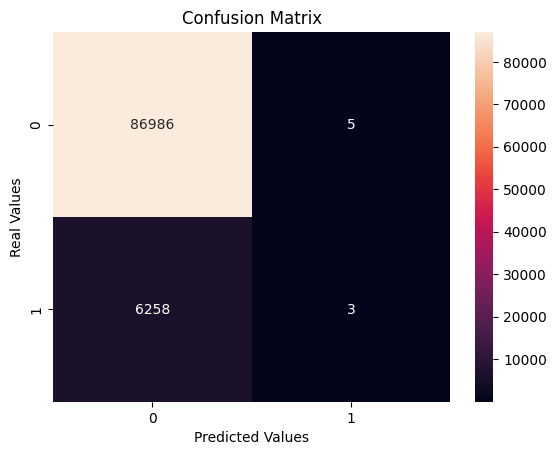

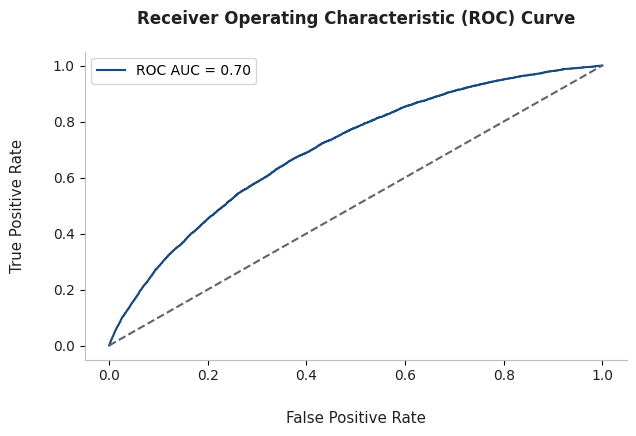

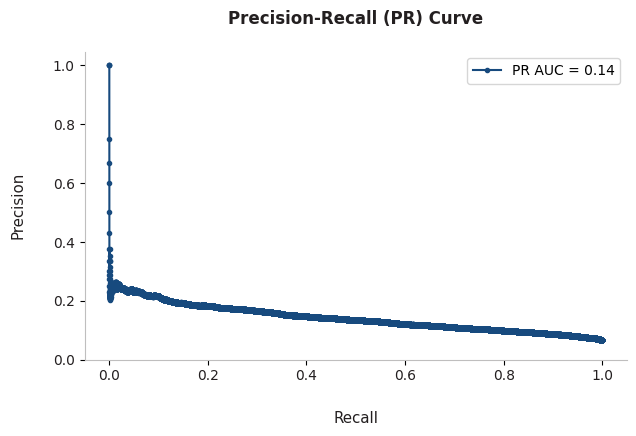

In [183]:
log_reg = LogisticRegression()
log_reg.fit(X_train_prepared, y_train)
p = log_reg.predict(X_test_prepared)
probas = log_reg.predict_proba(X_test_prepared)[:, 1]
evaluate_classifier(y_test, p, probas)

In [184]:
probas

array([0.37215923, 0.14112515, 0.20525837, ..., 0.18838096, 0.06217208,
       0.08646992])

Text(0, 0.5, 'Taxa de Evento')

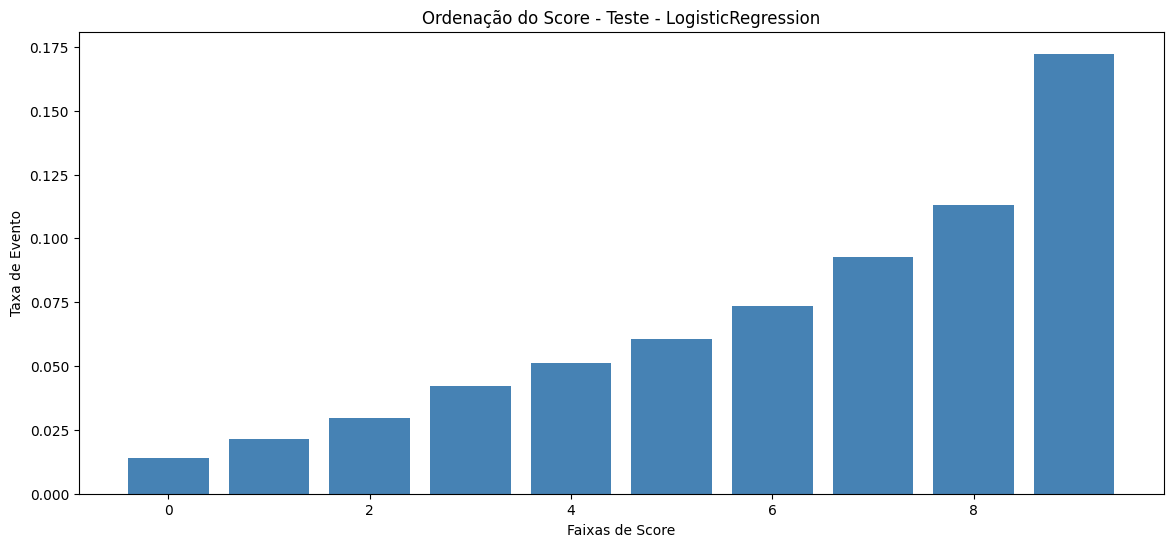

In [185]:
fig, ax = plt.subplots(figsize=(14, 6))

# Previsão das probabilidades no conjunto de treino
probabilidades = probas

# Adiciona um pequeno ruído às probabilidades
noise = np.random.uniform(0, 0.0001, size=probabilidades.shape)
probabilidades += noise

# Arredonda com 10 casas decimais para não ter problema de duplicatas de limites de bins
#probabilidades = round(probabilidades,10)

# Cria um DataFrame com as probabilidades e as respostas reais
df = pd.DataFrame({'Probabilidades': probabilidades, 'Resposta Real': y_test})

# Classifica o DataFrame com base nas probabilidades
df = df.sort_values(by='Probabilidades', ascending=False)

# Calcula os deciles
df['Deciles'] = pd.qcut(df['Probabilidades'], q=10, labels=False, duplicates='drop')

# Calcula a taxa de evento em cada decile
# Pega a média dos scores que foram agrupados em cada faixa
decile_analysis = df.groupby('Deciles')['Resposta Real'].mean().reset_index()

# Plota o gráfico de barras com os deciles e a taxa de evento
ax.bar(decile_analysis['Deciles'], decile_analysis['Resposta Real'], color='steelblue')
ax.set_title('Ordenação do Score - Teste - ' + 'LogisticRegression')
ax.set_xlabel('Faixas de Score')
ax.set_ylabel('Taxa de Evento')

Text(0, 0.5, 'Taxa de Evento')

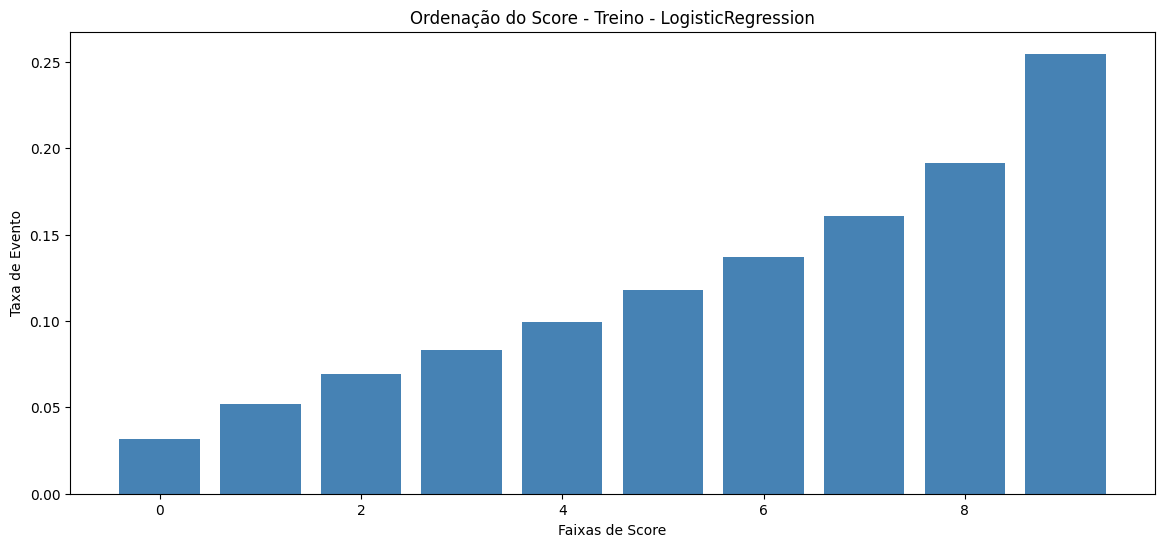

In [186]:
probas1 = log_reg.predict_proba(X_train_prepared)[:, 1]
fig, ax = plt.subplots(figsize=(14, 6))

# Previsão das probabilidades no conjunto de treino
probabilidades = probas1

# Adiciona um pequeno ruído às probabilidades
noise = np.random.uniform(0, 0.0001, size=probabilidades.shape)
probabilidades += noise

# Arredonda com 10 casas decimais para não ter problema de duplicatas de limites de bins
#probabilidades = round(probabilidades,10)

# Cria um DataFrame com as probabilidades e as respostas reais
df = pd.DataFrame({'Probabilidades': probabilidades, 'Resposta Real': y_train})

# Classifica o DataFrame com base nas probabilidades
df = df.sort_values(by='Probabilidades', ascending=False)

# Calcula os deciles
df['Deciles'] = pd.qcut(df['Probabilidades'], q=10, labels=False, duplicates='drop')

# Calcula a taxa de evento em cada decile
# Pega a média dos scores que foram agrupados em cada faixa
decile_analysis = df.groupby('Deciles')['Resposta Real'].mean().reset_index()

# Plota o gráfico de barras com os deciles e a taxa de evento
ax.bar(decile_analysis['Deciles'], decile_analysis['Resposta Real'], color='steelblue')
ax.set_title('Ordenação do Score - Treino - ' + 'LogisticRegression')
ax.set_xlabel('Faixas de Score')
ax.set_ylabel('Taxa de Evento')

In [187]:
# Criar tabela detalhada
# Previsão das probabilidades no conjunto de treino
probabilidades = probas1

# Adiciona um pequeno ruído às probabilidades
noise = np.random.uniform(0, 0.0001, size=probabilidades.shape)
probabilidades += noise

# Arredonda com 10 casas decimais para não ter problema de duplicatas de limites de bins
#probabilidades = round(probabilidades,10)

# Cria um DataFrame com as probabilidades e as respostas reais
df = pd.DataFrame({'Probabilidades': probabilidades, 'Resposta Real': y_train})

# Classifica o DataFrame com base nas probabilidades
df = df.sort_values(by='Probabilidades', ascending=False)

# Calcula os deciles
df['Deciles'] = pd.qcut(df['Probabilidades'], q=10, labels=False, duplicates='drop')

table = df.groupby('Deciles').agg(
min_score=pd.NamedAgg(column='Probabilidades', aggfunc='min'),
max_score=pd.NamedAgg(column='Probabilidades', aggfunc='max'),
event_rate=pd.NamedAgg(column='Resposta Real', aggfunc='mean'),
volume=pd.NamedAgg(column='Resposta Real', aggfunc='size')
).reset_index()
table

,Deciles,min_score,max_score,event_rate,volume
0,0,0.000032,0.044720,0.031849,37301
1,1,0.044720,0.063018,0.052198,37300
2,2,0.063018,0.078793,0.069464,37300
3,3,0.078793,0.093951,0.083081,37301
4,4,0.093951,0.109285,0.099732,37300
5,5,0.109285,0.125876,0.117989,37300
6,6,0.125876,0.145001,0.137154,37301
7,7,0.145001,0.169739,0.160590,37300
8,8,0.169739,0.208485,0.191609,37300
9,9,0.208489,0.889201,0.254819,37301


In [188]:
# Criar tabela detalhada
# Previsão das probabilidades no conjunto de treino
probabilidades = probas

# Adiciona um pequeno ruído às probabilidades
noise = np.random.uniform(0, 0.0001, size=probabilidades.shape)
probabilidades += noise

# Arredonda com 10 casas decimais para não ter problema de duplicatas de limites de bins
#probabilidades = round(probabilidades,10)

# Cria um DataFrame com as probabilidades e as respostas reais
df = pd.DataFrame({'Probabilidades': probabilidades, 'Resposta Real': y_test})

# Classifica o DataFrame com base nas probabilidades
df = df.sort_values(by='Probabilidades', ascending=False)

# Calcula os deciles
df['Deciles'] = pd.qcut(df['Probabilidades'], q=10, labels=False, duplicates='drop')

table = df.groupby('Deciles').agg(
min_score=pd.NamedAgg(column='Probabilidades', aggfunc='min'),
max_score=pd.NamedAgg(column='Probabilidades', aggfunc='max'),
event_rate=pd.NamedAgg(column='Resposta Real', aggfunc='mean'),
volume=pd.NamedAgg(column='Resposta Real', aggfunc='size')
).reset_index()
table

,Deciles,min_score,max_score,event_rate,volume
0,0,0.000080,0.036246,0.014047,9326
1,1,0.036246,0.054000,0.021555,9325
2,2,0.054000,0.070135,0.029598,9325
3,3,0.070135,0.085409,0.042466,9325
4,4,0.085409,0.100321,0.051260,9325
5,5,0.100321,0.115933,0.060697,9325
6,6,0.115938,0.133716,0.073566,9325
7,7,0.133721,0.157405,0.092761,9325
8,8,0.157409,0.194734,0.113029,9325
9,9,0.194736,0.569308,0.172421,9326


Idea:
- Construct a preprocessing class that will perform feature discretization and categories bundling as we planned in 2_eda.ipynb.
- After the features are discretized and the categories are bundled, apply one-hot encoding to obtain the desired dummies. 
- Use "drop" parameter to drop the reference categories -> "Specifies a methodology to use to drop one of the categories per feature." "array : drop[i] is the category in feature X[:, i] that should be dropped."
- Use "get_features_names_out" method to obtain a list of the dummies created, in order.
- It is all there: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- Integrate everything into one preprocessor. The method "get_feature_names_out()" will give us the one hot encoded features names.
